# Laboratorio 3

## Parte 1: Implementacion de Newton-Rhapson

In [ ]:

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir la variable simbólica
x = sp.symbols('x')

#fuentes
f = x**5 - 8*x**3 + 10*x + 6
f_sharp = sp.diff(f, x)
f_double_sharp = sp.diff(f_sharp, x)  
f_num = sp.lambdify(x, f, 'numpy')
f_prime_num = sp.lambdify(x, f_sharp, 'numpy')
f_double_prime_num = sp.lambdify(x, f_double_sharp, 'numpy')

# Implementar el método de Newton-Raphson para encontrar los puntos críticos
def newton_raphson(x0, alpha=1, tol=0.001, max_iter=100):
    for _ in range(max_iter):
        f_prime_val = f_prime_num(x0)
        f_double_prime_val = f_double_prime_num(x0)
        
        # Calcular el nuevo valor de x usando el método de Newton-Raphson
        x1 = x0 - alpha * (f_prime_val / f_double_prime_val)
        
        # Verificar la convergencia
        if abs(f_prime_val) < tol:
            return x1
        
        x0 = x1
    return x0

f_num = sp.lambdify(x, f, 'numpy')
# Evaluar los puntos críticos para encontrar el mínimo y máximo global
x_vals = np.linspace(-6, 6, 400)
y_vals = f_num(x_vals)


# Función para encontrar todos los puntos críticos
def encontrar_puntos_criticos(x0_vals, alpha=1):
    puntos_criticos = []
    for x0 in x0_vals:
        x_critico = newton_raphson(x0, alpha)
        if x_critico not in puntos_criticos:
            puntos_criticos.append(x_critico)
    return puntos_criticos

# Encontrar los puntos críticos en el intervalo [-3, 3]
x0_vals = np.linspace(-3, 3, 10)
puntos_criticos = encontrar_puntos_criticos(x0_vals)

# Evaluar si son mínimos o máximos locales
minimos = []
maximos = []
for punto in puntos_criticos:
    segunda_derivada = f_double_prime_num(punto)
    if segunda_derivada > 0:
        minimos.append(round(punto, 4))
    elif segunda_derivada < 0:
        maximos.append(round(punto, 4))

# Evaluar los puntos críticos para encontrar el mínimo y máximo global
x_vals = np.linspace(-3, 3, 400)
y_vals = f_num(x_vals)

min_global = min(puntos_criticos, key=lambda x: f_num(x))
max_global = max(puntos_criticos, key=lambda x: f_num(x))

# Graficar la función
plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals, label='y = x^5 - 8x^3 + 10x + 6')


# Graficar los mínimos locales
for minimo in set(minimos):

    plt.plot(minimo, f_num(minimo), 'ko', label=f'Mínimo local en x={minimo:.3f}')

# Graficar los máximos locales
for maximo in set(maximos):

    plt.plot(maximo, f_num(maximo), 'ko', label=f'Máximo local en x={maximo:.3f}')

# Graficar el mínimo y máximo global
plt.plot(min_global, f_num(min_global), 'ro', label=f'Mínimo global en x={min_global:.3f}')
plt.plot(max_global, f_num(max_global), 'ro', label=f'Máximo global en x={max_global:.3f}')

# Configurar la gráfica
plt.title('Método de Newton-Raphson: Mínimos y Máximos Locales')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

## Parte 2: Método Newton-Rhapson en 2 Dimensiones



Matplotlib is building the font cache; this may take a moment.


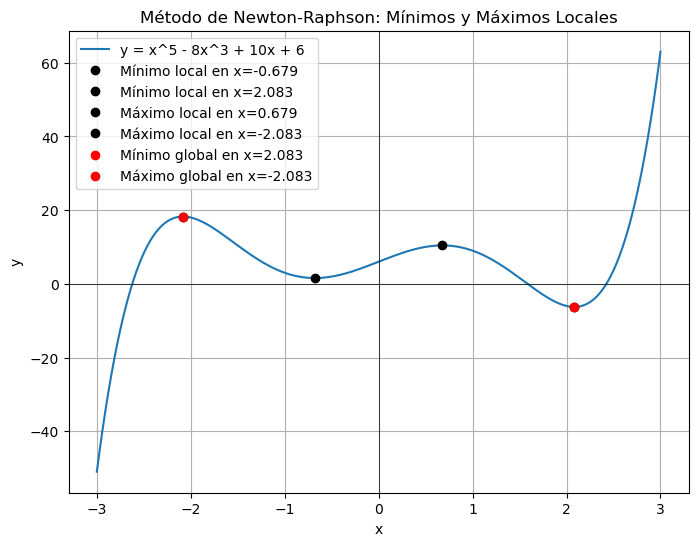

: 

: 

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 26 08:52:40 2024

@author: Elkur
"""

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir la variable simbólica
x = sp.symbols('x')

# Definir la función
f = x**5 - 8*x**3 + 10*x + 6

# Derivadas de la función
f_prime = sp.diff(f, x)  # Primera derivada
f_double_prime = sp.diff(f_prime, x)  # Segunda derivada

# Convertir la función y derivadas a funciones numéricas
f_num = sp.lambdify(x, f, 'numpy')
f_prime_num = sp.lambdify(x, f_prime, 'numpy')
f_double_prime_num = sp.lambdify(x, f_double_prime, 'numpy')

# Implementar el método de Newton-Raphson para encontrar los puntos críticos
def newton_raphson(x0, alpha=1, tol=0.001, max_iter=100):
    for _ in range(max_iter):
        f_prime_val = f_prime_num(x0)
        f_double_prime_val = f_double_prime_num(x0)
        
        # Calcular el nuevo valor de x usando el método de Newton-Raphson
        x1 = x0 - alpha * (f_prime_val / f_double_prime_val)
        
        # Verificar la convergencia
        if abs(f_prime_val) < tol:
            return x1
        
        x0 = x1
    return x0

# Función para encontrar todos los puntos críticos
def encontrar_puntos_criticos(x0_vals, alpha=1):
    puntos_criticos = []
    for x0 in x0_vals:
        x_critico = newton_raphson(x0, alpha)
        if x_critico not in puntos_criticos:
            puntos_criticos.append(x_critico)
    return puntos_criticos

# Encontrar los puntos críticos en el intervalo [-3, 3]
x0_vals = np.linspace(-3, 3, 10)
puntos_criticos = encontrar_puntos_criticos(x0_vals)

# Evaluar si son mínimos o máximos locales
minimos = []
maximos = []
for punto in puntos_criticos:
    segunda_derivada = f_double_prime_num(punto)
    if segunda_derivada > 0:
        minimos.append(round(punto, 4))
    elif segunda_derivada < 0:
        maximos.append(round(punto, 4))

# Evaluar los puntos críticos para encontrar el mínimo y máximo global
x_vals = np.linspace(-3, 3, 400)
y_vals = f_num(x_vals)

min_global = min(puntos_criticos, key=lambda x: f_num(x))
max_global = max(puntos_criticos, key=lambda x: f_num(x))

# Graficar la función
plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals, label='y = x^5 - 8x^3 + 10x + 6')


# Graficar los mínimos locales
for minimo in set(minimos):

    plt.plot(minimo, f_num(minimo), 'ko', label=f'Mínimo local en x={minimo:.3f}')

# Graficar los máximos locales
for maximo in set(maximos):

    plt.plot(maximo, f_num(maximo), 'ko', label=f'Máximo local en x={maximo:.3f}')

# Graficar el mínimo y máximo global
plt.plot(min_global, f_num(min_global), 'ro', label=f'Mínimo global en x={min_global:.3f}')
plt.plot(max_global, f_num(max_global), 'ro', label=f'Máximo global en x={max_global:.3f}')

# Configurar la gráfica
plt.title('Método de Newton-Raphson: Mínimos y Máximos Locales')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

## Parte 3: Newton-Rhapson en 3 Dimensiones

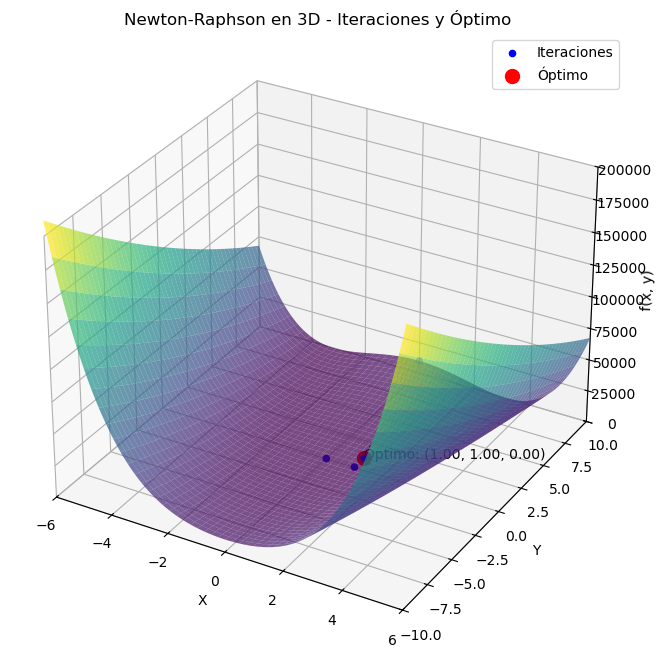

: 

: 

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x, y = sp.symbols('x y')

funcion_rosenbrock = (x - 1)**2 + 100 * (y - x**2)**2

# Derivadas parciales
gradiente = [sp.diff(funcion_rosenbrock, var) for var in (x, y)]

# Hessiano (segunda derivada)
hessiano = sp.hessian(funcion_rosenbrock, (x, y))

# Expresiones simbólicas a funciones numéricas
funcion_numerica_rosenbrock = sp.lambdify((x, y), funcion_rosenbrock, 'numpy')
gradiente_numerico = sp.lambdify((x, y), gradiente, 'numpy')
hessiano_numerico = sp.lambdify((x, y), hessiano, 'numpy')

def newton_raphson_optimizacion(punto_inicial_a, punto_inicial_b, alph=1.0):
    trayectoria = [(punto_inicial_a, punto_inicial_b)]
    a_val, b_val = punto_inicial_a, punto_inicial_b
    while True:
        valor_gradiente = np.array(gradiente_numerico(a_val, b_val), dtype=float)
        if np.linalg.norm(valor_gradiente) < 0.001:
            break
        valor_hessiano = np.array(hessiano_numerico(a_val, b_val), dtype=float)
        paso = np.linalg.solve(valor_hessiano, valor_gradiente)
        a_val, b_val = np.array([a_val, b_val]) - alph * paso 
        trayectoria.append((a_val, b_val))
    return np.array(trayectoria)

a_inicial, b_inicial = 0, 10
alph = 1
trayectoria = newton_raphson_optimizacion(a_inicial, b_inicial, alph)

# Grafica
valores_a = np.linspace(-6, 6, 400)
valores_b = np.linspace(-10, 10, 400)
A, B = np.meshgrid(valores_a, valores_b)
Z = funcion_numerica_rosenbrock(A, B)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, Z, cmap='viridis', alpha=0.7)

trayectoria_a = trayectoria[:, 0]
trayectoria_b = trayectoria[:, 1]
trayectoria_z = funcion_numerica_rosenbrock(trayectoria_a, trayectoria_b)
ax.scatter(trayectoria_a, trayectoria_b, trayectoria_z, color='blue', label="Iteraciones", zorder=6)

optimo_a, optimo_b = trayectoria[-1]
optimo_z = funcion_numerica_rosenbrock(optimo_a, optimo_b)
ax.scatter([optimo_a], [optimo_b], [optimo_z], color='red', s=100, label="Óptimo", zorder=7)
ax.text(optimo_a, optimo_b, optimo_z, f'Óptimo: ({optimo_a:.2f}, {optimo_b:.2f}, {optimo_z:.2f})', color='black')

ax.set_xlim([-6, 6])
ax.set_ylim([-10, 10])
ax.set_zlim([0, 200000])

ax.set_title("Newton-Raphson en 3D - Iteraciones y Óptimo")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x, y)")
ax.legend()

plt.show()
